In [2]:
import os

os.chdir(r'D:\subFinder')

In [3]:
import pandas as pd
import gensim
from Codes.Supervised_Trainer import run_end_to_end
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# jf_marine = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.marine.clean", sep = "\t", header = None)

In [5]:
# jf_oral = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.oral.clean", sep = "\t", header = None)

In [6]:
# jf_rumen = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.rumen.clean", sep = "\t", header = None)

In [7]:
jf_marine = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.marine.clean", sep = "\t", header = None)

In [8]:
# jf_all = pd.concat([jf_marine, jf_oral, jf_rumen, jf_uhgg], 0, ignore_index = True)

In [9]:
# jf_all = jf_all[[1,2,3,4]]

In [10]:
jf_marine = jf_marine[[1,2,3,4]]

In [11]:
jf_marine.columns = ["cgc_id", "sig_gene_seq", "PULid", "high_level_substr"]

In [12]:
jf_marine.head()

,cgc_id,sig_gene_seq,PULid,high_level_substr
0,MGYG000296011_5|CGC1,"GH65,GH13,GH13,null,9.A.24.1.7",X,starch
1,MGYG000296013_12|CGC1,"2.A.2.3.6,GH1,2.A.1.7.10,GH3,1.B.14.12.1,GH16_...",X,beta-glucan
2,MGYG000296017_51|CGC1,"GH115,GH115,GH43|GH43_1,null,2.A.2.3.6",X,xylan
3,MGYG000296017_60|CGC1,"GH67,GH67,8.A.5.1.6",X,xylan
4,MGYG000296017_84|CGC1,"2.A.37.1.1,null,3.A.1.25.7,2.4.1.321|GH94,GH94...",X,cellulose


In [13]:
jf_marine["cgc_id"].value_counts()

MGYG000296188_1|CGC10    3
MGYG000296971_56|CGC1    3
MGYG000296602_6|CGC1     3
MGYG000296075_2|CGC12    3
MGYG000296075_2|CGC11    3
                        ..
MGYG000296424_2|CGC3     1
MGYG000296422_5|CGC1     1
MGYG000296422_4|CGC2     1
MGYG000296422_3|CGC1     1
MGYG000297503_2|CGC1     1
Name: cgc_id, Length: 2149, dtype: int64

In [14]:
jf_marine = jf_marine.drop_duplicates("cgc_id")

In [15]:
jf_marine.shape

(2149, 4)

In [16]:
jf_marine.columns = ["cgc_id", "sig_gene_seq", "PULid", "JF_high_level_substr"]

In [17]:
## read subfinder output
subfinder_marine = pd.read_csv(r"Data/Output/Predictions/Predictions_marine_with_probability_and_p_values_Blast_Style_new_sup_new_unsup.csv")

In [18]:
subfinder_marine.shape

(84350, 4)

In [19]:
subfinder_marine["sequence"].nunique()

12050

In [20]:
subfinder_marine.head()

,sequence,substrate,probability_score,p_value
0,"1.A.1,2.A.25,1.I.1,null,Trans_reg_C,2.A.37,GH73",beta-glucan,0.492000,0.696381
1,"1.A.1,2.A.25,1.I.1,null,Trans_reg_C,2.A.37,GH73",starch,0.438000,0.999512
2,"1.A.1,2.A.25,1.I.1,null,Trans_reg_C,2.A.37,GH73",alginate,0.193333,0.999969
3,"1.A.1,2.A.25,1.I.1,null,Trans_reg_C,2.A.37,GH73",cellulose,0.218667,0.999969
4,"1.A.1,2.A.25,1.I.1,null,Trans_reg_C,2.A.37,GH73",host glycan,0.322667,0.999969


In [21]:
subfinder_marine.columns = ["sequence", "subFinder_high_level_substr", "probability_score", "p_value"]

In [22]:
len(subfinder_marine.groupby('sequence')['probability_score'].idxmax().values)

12050

In [23]:
subfinder_marine_preds = subfinder_marine.iloc[subfinder_marine.groupby('sequence')['probability_score'].idxmax().values,:]

In [24]:
subfinder_marine_preds = subfinder_marine_preds.reset_index(drop = True)

In [25]:
subfinder_marine_preds.head()

,sequence,subFinder_high_level_substr,probability_score,p_value
0,"1.A.1,2.A.25,1.I.1,null,Trans_reg_C,2.A.37,GH73",beta-glucan,0.492000,0.696381
1,"1.A.1,2.A.25,GH19",starch,0.400000,0.999512
2,"1.A.1,2.A.25,null,null,GH13_7",starch,0.516000,0.150879
3,"1.A.1,2.A.28,null,2.A.6,PL42",beta-glucan,0.375333,0.999969
4,"1.A.1,2.A.86,GH3,null,2.A.1",beta-glucan,0.590000,0.000000


In [26]:
to_keep = subfinder_marine["subFinder_high_level_substr"].unique()

In [27]:
marine_data = pd.read_csv(r"Data/Output/Unsupervised_10_12/output_marine.csv")

In [28]:
marine_data = marine_data.drop_duplicates("sequence")

In [29]:
subfinder_marine_preds = subfinder_marine_preds.merge(marine_data, how = "left", on = "sequence")

In [30]:
subfinder_marine_preds.shape

(12050, 5)

In [31]:
subfinder_marine_preds.head()

,sequence,subFinder_high_level_substr,probability_score,p_value,cgc_id
0,"1.A.1,2.A.25,1.I.1,null,Trans_reg_C,2.A.37,GH73",beta-glucan,0.492000,0.696381,MGYG000297265_55|CGC1
1,"1.A.1,2.A.25,GH19",starch,0.400000,0.999512,MGYG000296252_32|CGC2
2,"1.A.1,2.A.25,null,null,GH13_7",starch,0.516000,0.150879,MGYG000296208_83|CGC1
3,"1.A.1,2.A.28,null,2.A.6,PL42",beta-glucan,0.375333,0.999969,MGYG000296410_39|CGC1
4,"1.A.1,2.A.86,GH3,null,2.A.1",beta-glucan,0.590000,0.000000,MGYG000296887_58|CGC1


In [32]:
subfinder_marine_preds = subfinder_marine_preds.sort_values("sequence").reset_index(drop = True)

In [33]:
subfinder_marine_preds.head()

,sequence,subFinder_high_level_substr,probability_score,p_value,cgc_id
0,"1.A.1,2.A.25,1.I.1,null,Trans_reg_C,2.A.37,GH73",beta-glucan,0.492000,0.696381,MGYG000297265_55|CGC1
1,"1.A.1,2.A.25,GH19",starch,0.400000,0.999512,MGYG000296252_32|CGC2
2,"1.A.1,2.A.25,null,null,GH13_7",starch,0.516000,0.150879,MGYG000296208_83|CGC1
3,"1.A.1,2.A.28,null,2.A.6,PL42",beta-glucan,0.375333,0.999969,MGYG000296410_39|CGC1
4,"1.A.1,2.A.86,GH3,null,2.A.1",beta-glucan,0.590000,0.000000,MGYG000296887_58|CGC1


In [34]:
# two filtering
# form jinfang keep those in top_k of subfinder
# and then also the common cgc ids
# some cgc ids from jinfang not found in the new data I received
# but it is minimal

In [35]:
jf_marine_to_kepp = jf_marine[jf_marine["JF_high_level_substr"].isin(to_keep)]

In [36]:
jf_marine_to_kepp.shape

(929, 4)

In [37]:
overlapped = subfinder_marine_preds.merge(jf_marine_to_kepp[["cgc_id", "JF_high_level_substr"]], how = "inner", on = ["cgc_id"])

In [38]:
overlapped.head()

,sequence,subFinder_high_level_substr,probability_score,p_value,cgc_id,JF_high_level_substr
0,"1.A.13,Sigma70_r2|Sigma70_r4_2,null,GH5_25|CBM4",beta-glucan,0.463333,0.982422,MGYG000297053_4|CGC4,beta-glucan
1,"1.A.14,8.A.59,LytTR,GH16_3,1.B.14,GH3,GerE,nul...",beta-glucan,0.733333,0.000000,MGYG000297316_8|CGC1,beta-glucan
2,"1.A.23,GH3,3.A.1,3.A.1",beta-glucan,0.484000,0.940765,MGYG000296002_34|CGC1,xylan
3,"1.A.23,GH3,3.A.1,3.A.1,3.A.1",beta-glucan,0.482000,0.940765,MGYG000296398_40|CGC1,xylan
4,"1.A.23,GH3,LexA_DNA_bind,null,3.A.7,null,GH23,...",beta-glucan,0.654000,0.000000,MGYG000297073_6|CGC1,beta-glucan


In [39]:
overlapped.shape

(845, 6)

In [40]:
match = overlapped[overlapped["subFinder_high_level_substr"] == overlapped["JF_high_level_substr"]]

match = match[["cgc_id", "sequence", "subFinder_high_level_substr", "JF_high_level_substr", "probability_score", "p_value"]]

In [41]:
match["subFinder_high_level_substr"].value_counts()

beta-glucan    203
starch         192
pectin          77
xylan           65
host glycan     54
alginate        39
cellulose        9
Name: subFinder_high_level_substr, dtype: int64

In [42]:
match =  match.sort_values("p_value").reset_index(drop = True)

In [43]:
match.head()

,cgc_id,sequence,subFinder_high_level_substr,JF_high_level_substr,probability_score,p_value
0,MGYG000297321_16|CGC1,"8.A.59,1.B.6,null,9.B.169,LacI,2.A.2,GH1,1.B.14",beta-glucan,beta-glucan,0.634667,0.0
1,MGYG000296612_7|CGC5,"CBM34|GH13_20,3.A.1,3.A.1,3.A.1",starch,starch,0.672000,0.0
2,MGYG000296289_8|CGC1,"9.B.34,null,null,GH43_12,GH67,null,null,GH2,GH115",xylan,xylan,0.771333,0.0
3,MGYG000296077_15|CGC1,"9.B.34,null,GH3,2.A.1,1.B.14,GH16_3,LytTR,8.A.59",beta-glucan,beta-glucan,0.772667,0.0
4,MGYG000297038_12|CGC1,"9.B.34,null,9.B.32,8.A.1,3.A.1,3.A.1,3.A.1,nul...",starch,starch,0.610000,0.0


In [44]:
match.to_csv(r"Data\Output\Predictions\marine_match_with_JF.csv", index = False)

In [45]:
cgc_id_seqs = match["cgc_id"].values

In [1]:
# rep_seq = np.repeat(cgc_id_seqs, subfinder_marine["subFinder_high_level_substr"].nunique())

In [46]:
subfinder_marine = subfinder_marine.merge(marine_data, how = "left", on = "sequence")

In [211]:
# subfinder_marine.head()

In [47]:
match_full_output = subfinder_marine[subfinder_marine["cgc_id"].isin(cgc_id_seqs)]

In [48]:
match_full_output = match_full_output.reset_index(drop = True)

In [50]:
match_full_output = match_full_output.set_index("cgc_id")

In [51]:
match_full_output = match_full_output.loc[cgc_id_seqs].reset_index()

In [52]:
match_full_output.to_csv(r"Data\Output\Predictions\marine_match_with_JF_Blast.csv", index = False)

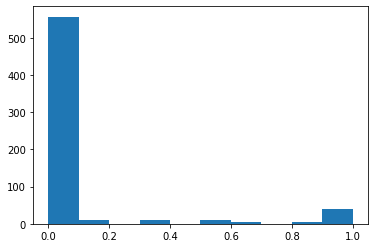

In [53]:
plt.hist(match["p_value"].values)
plt.show()

In [54]:
np.percentile(match["p_value"], np.arange(80,90))

array([0.00369263, 0.00369263, 0.00369263, 0.01757812, 0.01757812,
       0.03007507, 0.05923462, 0.05923462, 0.15087891, 0.2761261 ])

In [221]:
match.shape

(639, 6)

In [222]:
overlapped.shape[0] + len(set(jf_marine_to_kepp["cgc_id"].values).difference(marine_data["cgc_id"].values))

929

In [223]:
jf_marine_to_kepp.shape

(929, 4)

In [224]:
len(set(jf_marine_to_kepp["cgc_id"].values).difference(marine_data["cgc_id"].values))

84

In [225]:
np.mean(overlapped["subFinder_high_level_substr"] == overlapped["JF_high_level_substr"])

0.7562130177514793

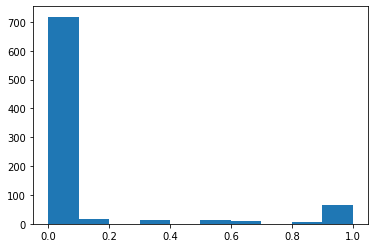

In [226]:
plt.hist(overlapped["p_value"])
plt.show()

In [227]:
thresholded = subfinder_marine_preds[subfinder_marine_preds["p_value"] <= 0.1]

In [228]:
thresholded_overlapped = thresholded.merge(jf_marine_to_kepp[["cgc_id", "JF_high_level_substr"]], how = "inner", on = ["cgc_id"])

In [229]:
thresholded_overlapped.shape

(718, 6)

In [230]:
np.mean(thresholded_overlapped["subFinder_high_level_substr"] == thresholded_overlapped["JF_high_level_substr"])

0.775766016713092